# **Not an ideal network**

In [1]:
# https://keras.io/
# Installing Keras in Colab environment(Colab is Docker container with its own setup) and then import Keras library
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Import numpy, Keras models, layers, utils and datasets modules

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
# Load MNIST dataset from Keras datasets module seperately as train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


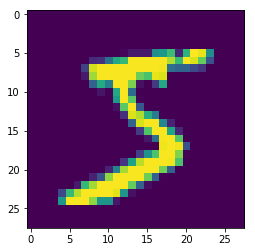

In [4]:
# Display the shape of train dataset. Also show the first image in the train dataset
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Reshape train and test dataset so that it also contains the channel information. MNIST contains grey scale images, hence this has just 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Convert the Tensor i.e. train and test dataset to float tensors. Also perform a min-max normalization where min = 0 and max = 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Show 10 items of labels from train dataset
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Show 10 labels from train dataset
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1.
# Display the model summary

from keras.layers import Activation, MaxPooling2D

# Input is an image of size 28x28 with 1 channel
model = Sequential() 

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #Input channel 1, number of filters 32, filter size is 3x3 with 1 channel. Receptive field is 3x3
model.add(Convolution2D(64, 3, 3, activation='relu'))#Input channels 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 5x5
model.add(Convolution2D(128, 3, 3, activation='relu'))#Input channels 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 7x7

model.add(MaxPooling2D(pool_size=(2, 2)))#Input channels 128, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 14x14

model.add(Convolution2D(256, 3, 3, activation='relu'))#Input channels 128, number of filters 256, filter size is 3x3 with 128 channels. Receptive field is 16x16
model.add(Convolution2D(512, 3, 3, activation='relu'))#Input channels 256, number of filters 512, filter size is 3x3 with 256 channels. Receptive field is 18x18
model.add(Convolution2D(1024, 3, 3, activation='relu'))#Input channels 512, number of filters 1024, filter size is 3x3 with 512 channels. Receptive field is 20x20
model.add(Convolution2D(2048, 3, 3, activation='relu'))#Input channels 1024, number of filters 2048, filter size is 3x3 with 1024 channels. Receptive field is 22x22
model.add(Convolution2D(10, 3, 3, activation='relu'))#Input channels 2048, number of filters 10, filter size is 3x3 with 2048 channels. Receptive field is 24x24

# Flatten the output from the last layer and pass these to softmax activation function
model.add(Flatten())
model.add(Activation('softmax'))

# Display model summary i.e. different layers and their dimentions
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update yo

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
# Compile the model to use "Categorical Crossentropy loss", "Adam" optimser and use accuracy metric
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# Train the model with batch size of 32 for 10 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 120s 2ms/step - loss: 1.8744 - acc: 0.3001
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.6639 - acc: 0.3861
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6526 - acc: 0.3885
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6512 - acc: 0.3879
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6461 - acc: 0.3891
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6452 - acc: 0.3891
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6447 - acc: 0.3891
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6420 - acc: 0.3898
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6456 - acc: 0.3889
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.6462 - a

In [0]:
# Evaluate the model using test dataset.
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
# Print the evaluation metric/score
print(score)

[1.6455676467895508, 0.3893]


In [0]:
# Perform predictions on test dataset
y_pred = model.predict(X_test)

In [16]:
# Print 9 predictions from test dataset. Also print the actual labels from test dataset
print(y_pred[:9])
print(y_test[:9])

[[1.1116206e-09 1.1116206e-09 1.1116206e-09 1.1116206e-09 1.1116206e-09
  1.1116206e-09 1.1116206e-09 1.0000000e+00 1.1116206e-09 1.1116206e-09]
 [4.5880510e-25 4.5880510e-25 1.0000000e+00 4.5880510e-25 4.5880510e-25
  4.5880510e-25 4.5880510e-25 4.5880510e-25 4.5880510e-25 4.5880510e-25]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 

# Model Observations



*   The effective global receptive field is 24x24 at the last layer. However the size of the image is 28x28. This means there are not as many layers as required so that the final receptive field is atleast the size of the image.
*   Although not a short fall, the model can also be constructed without using max pool, due to the small size of the images. GPU can easily hold the entire model in memory
*   The number of channels used in the model are more. Since MNIST contains grey scale images, we may not need huge number of channels. Probably we can achieve good accuracy with less number of features i.e. less number of channels.



### **References & Attributions:**

*   Keras (https://keras.io/)

*   Tensorflow 2.1 (https://www.tensorflow.org/api_docs/python/)


*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*